### Group
### Timo Reents
### Timo Marks
### Sercan Dede
### Jonathan Hungerland
### Chinmay Chandratre

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["font.size"] = 15


In [11]:
x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
l = np.array([0, 1, 1, 1])

# Task A

Text(0, 0.5, '$x_2$')

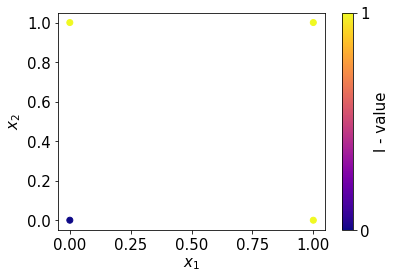

In [3]:
fig, ax = plt.subplots()

cmap = ax.scatter(x[:, 0], x[:, 1], c=l, cmap="plasma", vmin=0, vmax=1)
plt.colorbar(cmap, ax=ax, ticks=[0, 1], label="l - value")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

The data points represent a logical `OR` function. It returns True if at least one component is True.

# Task B

At $\left(W_{11}s_1^{(1)} + W_{12}s_2^{(1)}\right) = 0$ the function is not differentiable. Therefore, one would encounter problems while deriving it for the update rule. 

# Task C

In [12]:
def train_perceptron(x, l, W, epsilon, print_=True):
    for episode in range(1, 500):
        if print_:
            print(f"episode {episode}")
        changed = [True] * 4
        error = 0
        for step in range(4):
            x_ = x[step, :]
            s_out = np.heaviside(W.dot(x_), 0)
            delta_W = - epsilon  * (s_out - l[step]) * x_
            W += delta_W
            if np.all(delta_W == 0.0):
                changed[step] = False
            if print_:
                print(f"output: {s_out} target: {l[step]} weights: {W}")
            
            error += np.abs(s_out - l[step])
            
        if print_:
            print("\n")
        if not any(changed):
            if print_:
                print(f"Converged after {episode} episodes")
            return W, error
        
    print("not converged")
    return None, None

In [13]:
W = np.array([0.0, 0.0])
epsilon = 1
trained_W, error = train_perceptron(x, l, W, epsilon)

episode 1
output: 0.0 target: 0 weights: [0. 0.]
output: 0.0 target: 1 weights: [1. 0.]
output: 0.0 target: 1 weights: [1. 1.]
output: 1.0 target: 1 weights: [1. 1.]


episode 2
output: 0.0 target: 0 weights: [1. 1.]
output: 1.0 target: 1 weights: [1. 1.]
output: 1.0 target: 1 weights: [1. 1.]
output: 1.0 target: 1 weights: [1. 1.]


Converged after 2 episodes


In [14]:
# Any error?
error

0.0

# Task D

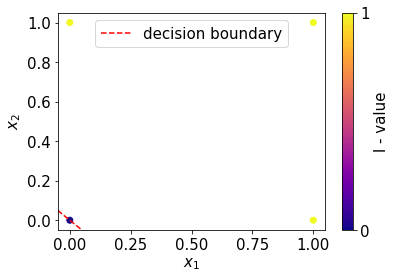

In [7]:
fig, ax = plt.subplots()

cmap = ax.scatter(x[:, 0], x[:, 1], c=l, cmap="plasma", vmin=0, vmax=1)
plt.colorbar(cmap, ax=ax, ticks=[0, 1], label="l - value")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.axline((0, 0), slope=-W[0]/W[1], color="red", linestyle="--", label="decision boundary")
ax.legend(loc="upper center")

In [8]:
results = []

for epsilon in np.linspace(0.01, 1, 20):
    W = np.random.normal(size=2)
    optimized_W, error = train_perceptron(x, l, W, epsilon, print_=False)
    result = {"epsilon": epsilon, "W0": W[0], "W1": W[1], "W0_opt": optimized_W[0], "W1_opt": optimized_W[1], "abs_error": error}
    results.append(result)
    
df_compare_initial = pd.DataFrame(results)

In [9]:
df_compare_initial

,epsilon,W0,W1,W0_opt,W1_opt,abs_error
0,0.010000,0.007990,1.269239,0.007990,1.269239,0.0
1,0.062105,0.003074,1.352282,0.003074,1.352282,0.0
2,0.114211,0.120381,0.628120,0.120381,0.628120,0.0
3,0.166316,0.562861,0.162443,0.562861,0.162443,0.0
4,0.218421,0.173204,1.698678,0.173204,1.698678,0.0
5,0.270526,0.011911,0.033728,0.011911,0.033728,0.0
6,0.322632,0.201690,0.752485,0.201690,0.752485,0.0
7,0.374737,0.021674,0.782822,0.021674,0.782822,0.0
8,0.426842,0.001034,0.611146,0.001034,0.611146,0.0
9,0.478947,0.324934,0.112413,0.324934,0.112413,0.0


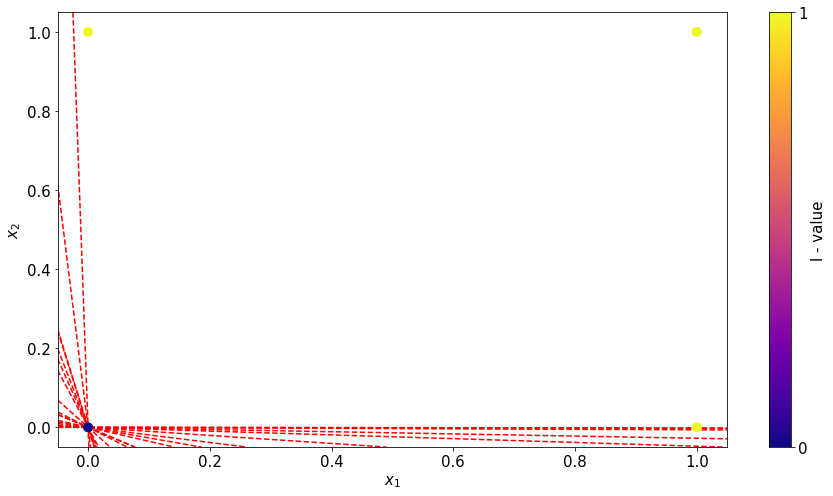

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))

cmap = ax.scatter(x[:, 0], x[:, 1], c=l, cmap="plasma", vmin=0, vmax=1, zorder=1, s=80)
plt.colorbar(cmap, ax=ax, ticks=[0, 1], label="l - value")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

#ax.legend(loc="upper center")

for W0, W1 in zip(df_compare_initial["W0_opt"], df_compare_initial["W1_opt"]):
    ax.axline((0, 0), slope=-W0/W1, color="red", linestyle="--", label="decision boundary", zorder=0)

The different initial parameters result in different decision boundaries. This is directly clear since the weights do not change further if the data points were classified correctly once. Therefore the lines/weights do not converge to the same values. 

# Task E

In [7]:
l[3] = 0
W = np.array([0.0, 0.0])
epsilon = 1
trained_W, error = train_perceptron(x, l, W, epsilon, print_ = False)

not converged


The training does not converge since there is no possibility to classify the datapoints correctly by a line. Opposite points have the same label but you cannot differtiate these points in two areas by one line. There will be always at least one point that is missmatched. Therefore, the label is always unequal to the predicted result which leads to a periodic change of the weights. Best seen if you use print_=True in the function.

# Task F

In [12]:
# Corrected version for task F
# Set heavy side function to 1 if x is equal to 0

def train_perceptron(x, l, W, epsilon, print_=True):
    for episode in range(1, 500):
        if print_:
            print(f"episode {episode}")
        changed = [True] * 4
        error = 0
        for step in range(4):
            x_ = x[step, :]
            s_out = np.heaviside(W.dot(x_), 1)
            delta_W = - epsilon  * (s_out - l[step]) * x_
            W += delta_W
            if np.all(delta_W == 0.0):
                changed[step] = False
            if print_:
                print(f"output: {s_out} target: {l[step]} weights: {W}")
            
            error += np.abs(s_out - l[step])
            
        if print_:
            print("\n")
        if not any(changed):
            if print_:
                print(f"Converged after {episode} episodes")
            return W, error
        
    print("not convered")
    return None, None

In [13]:
l = [1, 0, 0, 0]
W = np.array([1.0, 1.0])
epsilon = 1
trained_W, error = train_perceptron(x, l, W, epsilon)

episode 1
output: 1.0 target: 1 weights: [1. 1.]
output: 1.0 target: 0 weights: [0. 1.]
output: 1.0 target: 0 weights: [0. 0.]
output: 1.0 target: 0 weights: [-1. -1.]


episode 2
output: 1.0 target: 1 weights: [-1. -1.]
output: 0.0 target: 0 weights: [-1. -1.]
output: 0.0 target: 0 weights: [-1. -1.]
output: 0.0 target: 0 weights: [-1. -1.]


Converged after 2 episodes


The problem is that the datapoints x2 - x4 are labeled correctly as 0 when the weights are set equal to 0. One can easily observe this by considering the heaviside function and the update rule. The first datapoint x1 would be labeled incorrectly as 0 however. But the data point has the coordinates (0, 0) and therefore $\Delta W$ (eq. 4) would be equal to zero. Therefore, the weights will not change eventhough the point is missclassified. Due to this, one achieves missleading convergence.

To correct this, one needs to redefine the heavyside funcation so that it returns 1 in case the argument is equal to 0 (see datapoint x1). This would lead to a $\Delta W$ value unequal to 0 and this way the weights would be further adapted.